#### This is my second attempt at using an Austin Traffic Data Set. This data set is very different than the first, and has far more columns.
#### I will try to see if it is actually differernt or just seems that way. 
#### also will try to be answering some questions.

### I-35 is particularly dangerous
### I-35 is particularly dangerous for XYZ underserved groups (cyclists, pedestrians, ethnic minorities)
### Expanding I-35 would make it even more dangerous
### Construction on I-35 makes it more dangerous

###### https://data.austintexas.gov/Transportation-and-Mobility/Austin-Crash-Report-Data-Crash-Level-Records/y2wy-tgr5

In [1]:
import pandas as pd

data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Austin_Crash_Report_Data_-_Crash_Level_Records_20231017.csv')

###"C:\Users\aaron\Code\DataScience\Data\Austin_Crash_Report_Data_-_Crash_Level_Records_20231017.csv"

pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten

data_frame.head()


C:\Users\aaron\AppData\Local\Temp\ipykernel_24376\4265935648.py:3: DtypeWarning: Columns (7,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('C:/Users/aaron/Code/Data/Austin_Crash_Report_Data_-_Crash_Level_Records_20231017.csv')


,crash_id,crash_fatal_fl,crash_date,crash_time,case_id,rpt_latitude,rpt_longitude,rpt_block_num,rpt_street_pfx,rpt_street_name,rpt_street_sfx,crash_speed_limit,road_constr_zone_fl,latitude,longitude,street_name,street_nbr,street_name_2,street_nbr_2,crash_sev_id,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,contrib_factr_p1_id,contrib_factr_p2_id,units_involved,atd_mode_category_metadata,pedestrian_fl,motor_vehicle_fl,motorcycle_fl,bicycle_fl,other_fl,point,apd_confirmed_fatality,apd_confirmed_death_count,motor_vehicle_death_count,motor_vehicle_serious_injury_count,bicycle_death_count,bicycle_serious_injury_count,pedestrian_death_count,pedestrian_serious_injury_count,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,onsys_fl,private_dr_fl,micromobility_serious_injury_count,micromobility_death_count,micromobility_fl
0,14139849,N,11/21/2014 10:45:00 AM,10:45:00,143250802,NaN,NaN,NaN,N,US HWY 183 NB,HWY,55.0,N,NaN,NaN,US0183I,NaN,RIATA TRACE PKWY,NaN,5,0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,Y,N,0,0,NaN
1,13561650,N,10/26/2013 08:07:00 PM,20:07:00,132991546,NaN,NaN,100,S,1ST,ST,35.0,N,30.255200,-97.751966,S 1ST ST,795.0,NaN,NaN,2,0,1.0,0.0,2.0,0.0,1.0,0,NaN,NaN,Other/Unknown & Passenger car & Large passenge...,"[{""mode_id"": 9, ""mode_desc"": ""Other/Unknown"", ...",NaN,Y,NaN,NaN,Y,POINT (-97.75196586 30.25519968),N,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,NaN
2,13584161,N,12/05/2013 11:20:00 AM,11:20:00,133390742,NaN,NaN,5000,NaN,NOT REPORTED,HWY,50.0,N,30.235571,-97.824631,US0290,NaN,SL0001,NaN,2,0,1.0,0.0,1.0,0.0,1.0,0,15.0,NaN,Passenger car & Large passenger vehicle,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,POINT (-97.82463074 30.23557091),N,0,0,0,0,0,0,0,0,0,0,0,Y,N,0,0,NaN
3,13517104,N,10/26/2013 01:02:00 PM,13:02:00,132990945,NaN,NaN,100,NaN,NOT REPORTED,BLVD,60.0,N,30.222614,-97.763375,US0290,NaN,NaN,NaN,5,0,0.0,0.0,4.0,0.0,0.0,0,NaN,NaN,Passenger car & Passenger car,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,NaN,NaN,POINT (-97.76337464 30.22261374),N,0,0,0,0,0,0,0,0,0,0,0,Y,N,0,0,NaN
4,13576768,N,11/30/2013 01:00:00 AM,01:00:00,133340093,NaN,NaN,801,W,GIBSON,ST,35.0,N,30.252332,-97.755953,W GIBSON ST,790.0,S 3RD ST,NaN,5,0,0.0,0.0,2.0,0.0,0.0,0,NaN,NaN,Large passenger vehicle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,NaN,NaN,POINT (-97.75595282 30.25233196),N,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,NaN


In [2]:
data_frame['crash_date'] = pd.to_datetime(data_frame['crash_date'], errors='coerce')
data_frame['crash_time'] = pd.to_datetime(data_frame['crash_time'], errors='coerce')

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148579 entries, 0 to 148578
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   crash_id                            148579 non-null  int64         
 1   crash_fatal_fl                      148579 non-null  object        
 2   crash_date                          148579 non-null  datetime64[ns]
 3   crash_time                          148579 non-null  datetime64[ns]
 4   case_id                             146740 non-null  object        
 5   rpt_latitude                        7872 non-null    float64       
 6   rpt_longitude                       7872 non-null    float64       
 7   rpt_block_num                       128519 non-null  object        
 8   rpt_street_pfx                      79730 non-null   object        
 9   rpt_street_name                     148575 non-null  object        
 10  rpt_stre

##### Quick note about the column names - Fl stands for Flag and and RPT stands for Reported

In [3]:
data_frame.nunique()

crash_id                              148579
crash_fatal_fl                             2
crash_date                            145433
crash_time                              1440
case_id                               146507
rpt_latitude                            6266
rpt_longitude                           5871
rpt_block_num                           5737
rpt_street_pfx                             8
rpt_street_name                         9850
rpt_street_sfx                            18
crash_speed_limit                         28
road_constr_zone_fl                        2
latitude                               93852
longitude                              93720
street_name                             4717
street_nbr                              9837
street_name_2                           3466
street_nbr_2                               0
crash_sev_id                               7
sus_serious_injry_cnt                      7
nonincap_injry_cnt                        14
poss_injry

In [4]:
data_frame['death_cnt'].value_counts()

0    147742
1       796
2        36
3         3
4         2
Name: death_cnt, dtype: int64

In [5]:
#### Here are the total deaths laid out

print ('Total Deaths - ', data_frame['death_cnt'].sum())
print ('Motor Vehicle Deaths - ', data_frame['motor_vehicle_death_count'].sum())
print ('Motor Cycle Deaths- ', data_frame['motorcycle_death_count'].sum())
print ('Ped deaths - ', data_frame['pedestrian_death_count'].sum())
print ('Bike Deaths - ', data_frame['bicycle_death_count'].sum())
print ('Micromibility Deaths - ', data_frame['micromobility_death_count'].sum())
print ('"Other" Deaths - ', data_frame['other_death_count'].sum())

Total Deaths -  885
Motor Vehicle Deaths -  424
Motor Cycle Deaths-  124
Ped deaths -  310
Bike Deaths -  27
Micromibility Deaths -  6
"Other" Deaths -  1


In [6]:
#create a few "masks"
total_death_mask = data_frame['death_cnt'] >= 1
motor_vehicle_death_mask = data_frame['motor_vehicle_death_count'] >= 1
motorcycle_death_mask = data_frame['motorcycle_death_count'] >= 1
ped_death_mask = data_frame['pedestrian_death_count'] >= 1
micromobility_death_mask = data_frame['micromobility_death_count'] >= 1
bike_death_mask = data_frame['bicycle_death_count'] >= 1

bike_deaths = data_frame[bike_death_mask]

bike_deaths.head()

,crash_id,crash_fatal_fl,crash_date,crash_time,case_id,rpt_latitude,rpt_longitude,rpt_block_num,rpt_street_pfx,rpt_street_name,rpt_street_sfx,crash_speed_limit,road_constr_zone_fl,latitude,longitude,street_name,street_nbr,street_name_2,street_nbr_2,crash_sev_id,sus_serious_injry_cnt,nonincap_injry_cnt,poss_injry_cnt,non_injry_cnt,unkn_injry_cnt,tot_injry_cnt,death_cnt,contrib_factr_p1_id,contrib_factr_p2_id,units_involved,atd_mode_category_metadata,pedestrian_fl,motor_vehicle_fl,motorcycle_fl,bicycle_fl,other_fl,point,apd_confirmed_fatality,apd_confirmed_death_count,motor_vehicle_death_count,motor_vehicle_serious_injury_count,bicycle_death_count,bicycle_serious_injury_count,pedestrian_death_count,pedestrian_serious_injury_count,motorcycle_death_count,motorcycle_serious_injury_count,other_death_count,other_serious_injury_count,onsys_fl,private_dr_fl,micromobility_serious_injury_count,micromobility_death_count,micromobility_fl
21499,14414790,Y,2015-04-01 17:32:00,2023-11-07 17:32:00,NaN,30.2823,-97.84138,1794,NaN,LOST CREEK,BLVD,30.0,N,30.281952,-97.841195,LOST CREEK BLVD,1801.0,UNKNOWN,NaN,4,0,0.0,0.0,2.0,0.0,0.0,1,48.0,NaN,Large passenger vehicle & Bicycle,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,Y,NaN,POINT (-97.84119462508461 30.28195200468942),N,0,0,0,1,0,0,0,0,0,0,0,N,N,0,0,NaN
23471,14481594,Y,2015-06-06 18:34:00,2023-11-07 18:34:00,151571536,NaN,NaN,6200,NaN,JOHNNY MORRIS,RD,30.0,N,30.296625,-97.650547,JOHNNY MORRIS RD,6431.0,NaN,NaN,4,0,0.0,0.0,2.0,0.0,0.0,1,NaN,NaN,Passenger car & Bicycle,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,Y,NaN,POINT (-97.65054705171825 30.296625026867122),Y,1,0,0,1,0,0,0,0,0,0,0,N,N,0,0,NaN
32734,14844698,Y,2015-12-22 06:31:00,2023-11-07 06:31:00,153560291,NaN,NaN,10100,NaN,BRODIE,LN,40.0,N,30.180931,-97.851481,BRODIE LN,10118.0,NaN,NaN,4,0,0.0,0.0,1.0,0.0,0.0,1,NaN,NaN,Large passenger vehicle & Bicycle & Large pass...,"[{""mode_id"": 2, ""mode_desc"": ""Large passenger ...",NaN,Y,NaN,Y,NaN,POINT (-97.85148067934854 30.180931020393484),Y,1,0,0,1,0,0,0,0,0,0,0,N,N,0,0,NaN
40395,15202234,Y,2016-07-10 23:40:00,2023-11-07 23:40:00,161921728,NaN,NaN,7100,N,BLUFF SPRINGS RD,NaN,45.0,N,30.173473,-97.768877,BLUFF SPRINGS RD,7823.0,UNKNOWN,NaN,4,0,0.0,0.0,0.0,1.0,0.0,1,NaN,NaN,Motor vehicle – other & Bicycle,"[{""mode_id"": 4, ""mode_desc"": ""Motor vehicle \u...",NaN,Y,NaN,Y,NaN,POINT (-97.76887725590615 30.173472741868547),Y,1,0,0,1,0,0,0,0,0,0,0,N,N,0,0,NaN
46993,15418213,Y,2016-11-05 07:20:00,2023-11-07 07:20:00,163100481,NaN,NaN,5200,W,US HWY 290 SVRD EB,NaN,-1.0,N,30.236095,-97.833156,US0290,NaN,NaN,NaN,4,0,0.0,0.0,1.0,0.0,0.0,1,NaN,NaN,Passenger car & Bicycle,"[{""mode_id"": 1, ""mode_desc"": ""Passenger car"", ...",NaN,Y,NaN,Y,NaN,POINT (-97.83315563970059 30.236095185803432),Y,1,0,0,1,0,0,0,0,0,0,0,Y,N,0,0,NaN


<Axes: xlabel='longitude', ylabel='latitude'>

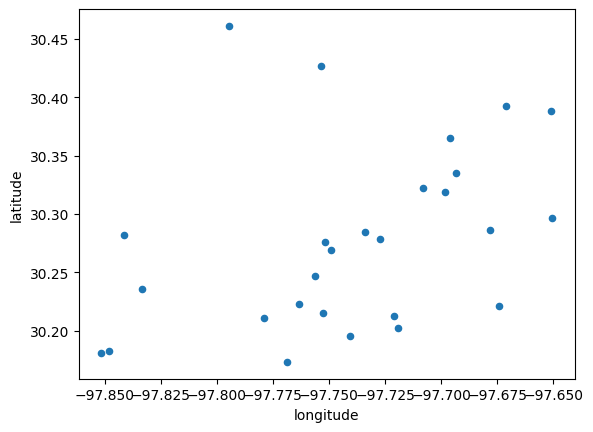

In [7]:
bike_deaths.plot(x='longitude', y='latitude', kind='scatter')

<Axes: xlabel='longitude', ylabel='latitude'>

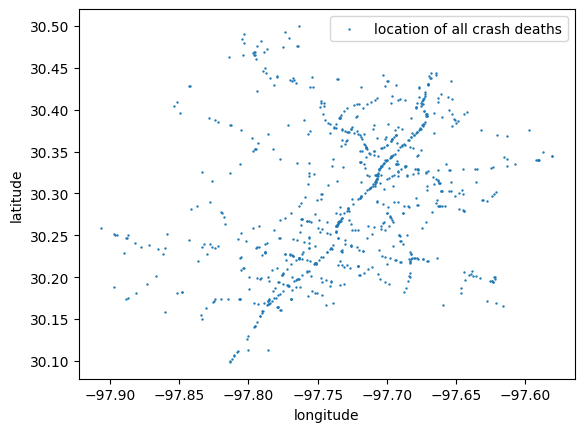

In [8]:
total_deaths = data_frame[total_death_mask]
total_deaths.plot(x='longitude', y='latitude', kind='scatter', s = 0.5, label = 'location of all crash deaths')

<Axes: xlabel='latitude', ylabel='longitude'>

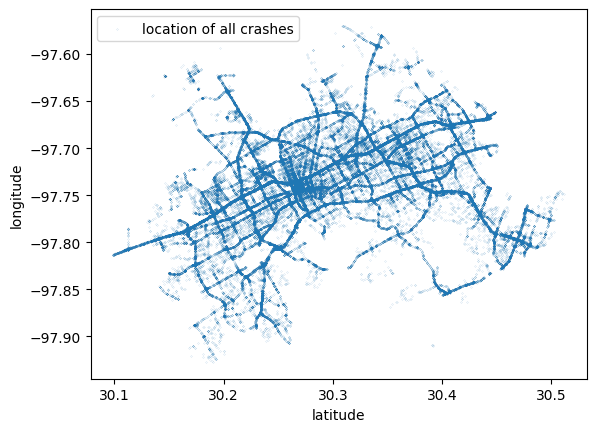

In [9]:
data_frame.plot(x='latitude', y='longitude', kind='scatter', s = 0.005, label = 'location of all crashes')